In [83]:
%pylab inline
from corpus import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [84]:
v = lda_v[40]

Loading LDA data from /home/jammurdo/ipynb/Dad Links/models/filtered-freq5-freq5-N600-LDA-K40-book-200.npz


In [86]:
v.topics()

[LabeledColumn([(u'transfer', 0.03775081025420706),
        (u'destination', 0.029039600267140756),
        (u'rsync', 0.02747604975664168), ...,
        (u'first', 2.233643586425225e-06), (u'must', 2.233643586425225e-06),
        (u'read', 2.233643586425225e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'attributes', 0.06363994491563249),
        (u'attribute', 0.05454900521549982),
        (u'node', 0.036030424344859174), ...,
        (u'cluster', 3.367014703749781e-06),
        (u'two', 3.367014703749781e-06), (u'state', 3.367014703749781e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'class', 0.04805671935839265), (u'method', 0.04608377407521181),
        (u'object', 0.037346444963982386), ...,
        (u'form', 1.4092466308421728e-06),
        (u'page', 1.4092466308421728e-06),
        (u'typing', 1.4092466308421728e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'open', 0.014465198256383033), (u'people', 0.01423190742086359),
        (u'two', 0.0131820986610261), ...,
        (u'must', 1.1664541775961518e-06),
        (u'agent', 1.1664541775961518e-06),
        (u'type', 1.1664541775961518e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'given', 0.03488908243249815), (u'type', 0.033425307209821495),
        (u'interface', 0.02342284318819766), ...,
        (u'enable', 2.4396253711272787e-06),
        (u'addresses', 2.4396253711255452e-06),
        (u'queries', 2.4396253711255452e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'vpc', 0.05293218348641368), (u'private', 0.04037676114416403),
        (u'subnet', 0.03594543561160533), ...,
        (u'job', 2.461847518085928e-06),
        (u'resource', 2.461847518085928e-06),
        (u'agent', 2.461847518085928e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'php', 0.03934538856543507), (u'type', 0.030537376797932253),
        (u'typing', 0.02319736699167991), ...,
        (u'amazon', 2.936003922498268e-06),
        (u'table', 2.936003922498268e-06),
        (u'partition', 2.936003922498268e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'consul', 0.032626554672702424), (u'nodes', 0.01962415986798803),
        (u'agent', 0.01796930962011529), ...,
        (u'distributed', 2.3640717826731945e-06),
        (u'things', 2.3640717826731945e-06),
        (u'address', 2.3640717826731945e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'systems', 0.021483250643554126),
        (u'memory', 0.021483250643554126),
        (u'request', 0.018586795301464922), ...,
        (u'line', 1.2068563925360702e-06),
        (u'test', 1.2068563925360702e-06), (u'case', 1.2068563925360702e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'unit', 0.04818310656869542), (u'systemd', 0.043313796293682316),
        (u'services', 0.03126866035022886), ...,
        (u'recommended', 2.562794881585332e-06),
        (u'pair', 2.5627948815835115e-06), (u'pca', 2.5627948815835115e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'log', 0.04523706310463482), (u'partition', 0.03096669619465538),
        (u'processing', 0.025043147665984672), ...,
        (u'comes', 2.692522058486151e-06),
        (u'application', 2.692522058484238e-06),
        (u'code', 2.692522058484238e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'would', 0.030978093619836583), (u'start', 0.018181005668295946),
        (u'means', 0.01696223538719684), ...,
        (u'provide', 1.015641900915e-06), (u'might', 1.015641900915e-06),
        (u'version', 1.015641900915e-06)], 
       dtype=[('word', '<U36'), ('value', '<f8')]),
 LabeledColumn([(u'group', 0.02811570839093699),
        (u'application', 0.021887939302380602),
        (u'resource', 0.020820321744342365), ...,
        (u'check', 1.779362596728778e-06),
        (u'

In [87]:
import re
import matplotlib.dates as mdates
from datetime import datetime
def convert_date(date):
    #date = re.sub('-00','-01', date)
    date = map(int, date.split('-'))
    date = '{2:4d}-{0:02d}-{1:02d}'.format(*date)
    date = datetime.strptime(date, "%Y-%m-%d")
    date = mdates.date2num(date)
    return date

days = sorted(v.labels, key=convert_date)

40
14
12
10
8


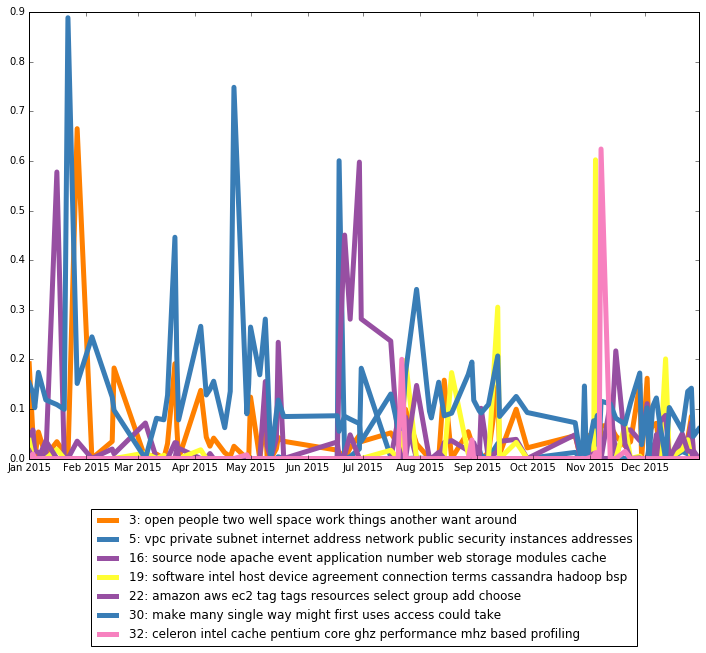

In [88]:
doc_topics = v.doc_topic_matrix(days)
colors=dict(get_topic_colors(v))
figsize(12,8)
t = v.topics()
for i in range(v.model.K):
    if np.any(doc_topics.T[i] > 0.55):
        plot_date(map(convert_date, days), doc_topics.T[i], ls='-', marker=None, c=colors[i],
                  label=str(i) +': ' + ' '.join(np.array(t[i])['word'][:10]), lw=5)

legend(bbox_to_anchor=[0.5,-0.1],loc='upper center')

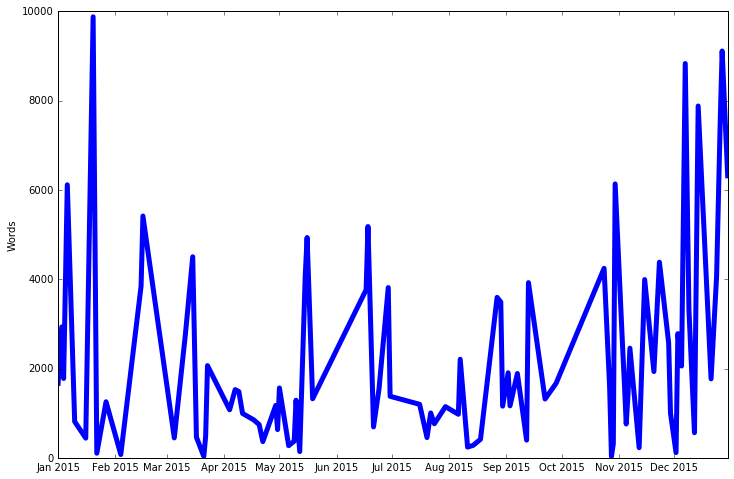

In [89]:
plot_date(map(convert_date, days), map(len, v.view_documents(days)), marker=None, ls='-', lw=5)
ylabel('Words')

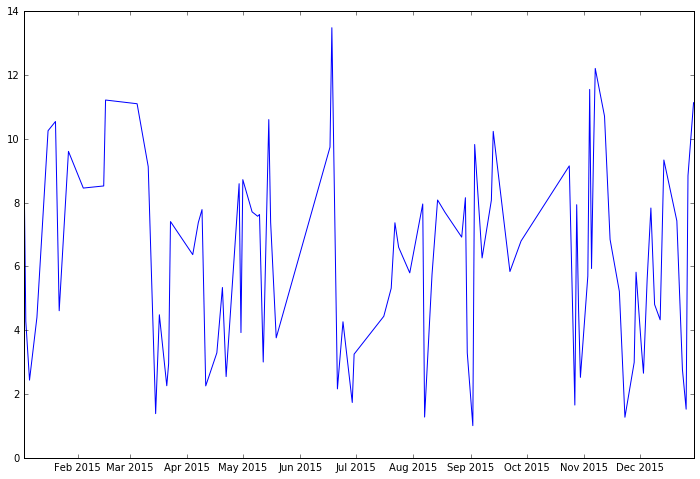

In [90]:
from vsm.spatial import *
doc_topics = v.doc_topic_matrix(days)
divergence = [KL_div(current, prev) for current, prev in zip(doc_topics[1:], doc_topics[:-1])]
plot_date(map(convert_date, days[1:]), divergence, marker=None, ls='-')
#yscale('log')

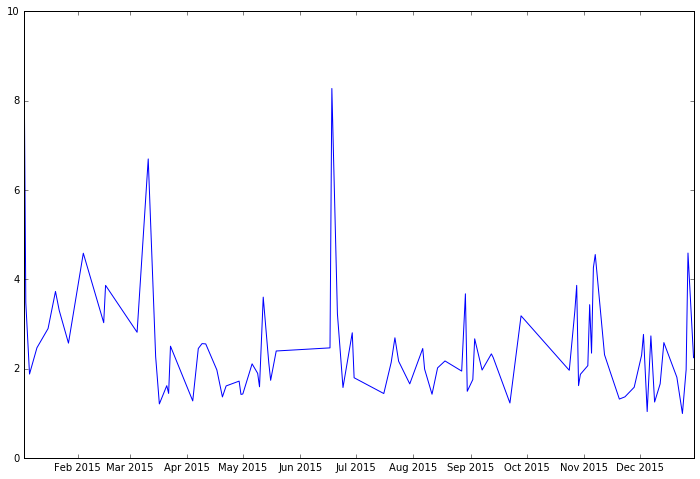

In [91]:
from vsm.spatial import *
doc_topics = v.doc_topic_matrix(days)
divergence = [KL_div(doc_topics[i], doc_topics[:i].mean(axis=0)) for i in range(1,len(doc_topics))]
plot_date(map(convert_date, days[1:]), divergence, marker=None, ls='-')

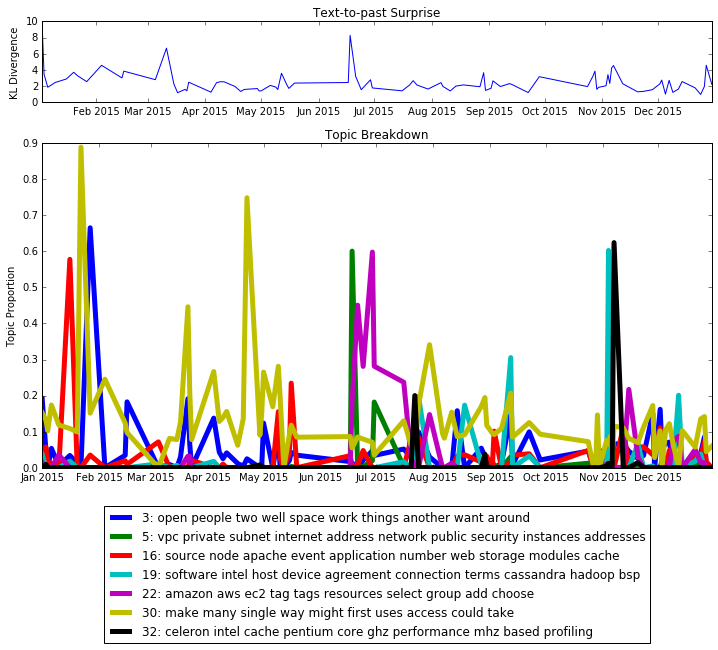

In [92]:
from matplotlib.gridspec import GridSpec
figsize(12,8)
gs = GridSpec(2, 1, height_ratios=[1,4])
doc_topics = v.doc_topic_matrix(days)
#colors=dict(get_topic_colors(v))
plt = subplot(gs[1])
t = v.topics()
for i in range(v.model.K):
    if np.any(doc_topics.T[i] > 0.55):
        plt.plot_date(map(convert_date, days), doc_topics.T[i], ls='-', marker=None, #c=colors[i],
                  label=str(i) +': ' + ' '.join(np.array(t[i])['word'][:10]), lw=5)
title("Topic Breakdown")
ylabel("Topic Proportion")
plt.legend(bbox_to_anchor=[0.5,-0.1],loc='upper center')

from vsm.spatial import *
doc_topics = v.doc_topic_matrix(days)
divergence = [KL_div(doc_topics[i], doc_topics[:i].mean(axis=0)) for i in range(1,len(doc_topics))]
plt=subplot(gs[0])
title("Text-to-past Surprise")
ylabel("KL Divergence")
plt.plot_date(map(convert_date, days[1:]), divergence, marker=None, ls='-')


In [98]:
print "Building date matrix"
dates = map(convert_date, days)
dates = np.array(dates)

def generate_epochs(N, start=None, limit=365):
    if start is None:
        start = [0]
    if N <= 1:
        if (dates[start[-1]] <= (dates[-1] - limit)
           and start[-1] + 1 < len(dates)):
            e = start[:]
            e.append(len(dates)-1)
            yield e[:]
    else:
        for i in range(start[-1]+2,len(dates)):
            if (dates[i] >= (dates[start[-1]] + limit)
                and dates[i] <= (dates[-1] - limit)):
                e = start[:]
                e.append(i)
                for epoch in generate_epochs(N-1, e, limit=limit):
                    yield epoch[:]

Building date matrix


In [100]:
[epoch for epoch in generate_epochs(4, limit=30)]

[[0, 9, 13, 22, 89],
 [0, 9, 13, 23, 89],
 [0, 9, 13, 24, 89],
 [0, 9, 13, 25, 89],
 [0, 9, 13, 26, 89],
 [0, 9, 13, 27, 89],
 [0, 9, 13, 28, 89],
 [0, 9, 13, 29, 89],
 [0, 9, 13, 30, 89],
 [0, 9, 13, 31, 89],
 [0, 9, 13, 32, 89],
 [0, 9, 13, 33, 89],
 [0, 9, 13, 34, 89],
 [0, 9, 13, 35, 89],
 [0, 9, 13, 36, 89],
 [0, 9, 13, 37, 89],
 [0, 9, 13, 38, 89],
 [0, 9, 13, 39, 89],
 [0, 9, 13, 40, 89],
 [0, 9, 13, 41, 89],
 [0, 9, 13, 42, 89],
 [0, 9, 13, 43, 89],
 [0, 9, 13, 44, 89],
 [0, 9, 13, 45, 89],
 [0, 9, 13, 46, 89],
 [0, 9, 13, 47, 89],
 [0, 9, 13, 48, 89],
 [0, 9, 13, 49, 89],
 [0, 9, 13, 50, 89],
 [0, 9, 13, 51, 89],
 [0, 9, 13, 52, 89],
 [0, 9, 13, 53, 89],
 [0, 9, 13, 54, 89],
 [0, 9, 13, 55, 89],
 [0, 9, 13, 56, 89],
 [0, 9, 13, 57, 89],
 [0, 9, 13, 58, 89],
 [0, 9, 13, 59, 89],
 [0, 9, 13, 60, 89],
 [0, 9, 13, 61, 89],
 [0, 9, 13, 62, 89],
 [0, 9, 13, 63, 89],
 [0, 9, 13, 64, 89],
 [0, 9, 13, 65, 89],
 [0, 9, 13, 66, 89],
 [0, 9, 13, 67, 89],
 [0, 9, 13, 68, 89],
 [0, 9, 13, 6

In [103]:
def mean_mle(s):
    return np.sum(s) / len(s)
def variance_mle(s):
    return np.sum((s - mean_mle(s))**2) / len(s)

divs = divergence
def divs_mle(e):
    temp = []
    for i in range(len(e) - 1):
        s = divs[e[i]:e[i+1]]

        val = len(s) / 2.
        val *= (1 + np.log(2*np.pi*variance_mle(s)))
        val *= -1
        temp.append(val)
    
    return np.sum(temp)

In [115]:
from matplotlib.dates import num2date
epochs = max(generate_epochs(6, limit=45), key=divs_mle)
for d in dates[np.array(epochs)]:
    print num2date(d)

2015-01-01 00:00:00+00:00
2015-03-11 00:00:00+00:00
2015-05-10 00:00:00+00:00
2015-06-29 00:00:00+00:00
2015-08-27 00:00:00+00:00
2015-11-07 00:00:00+00:00
2015-12-30 00:00:00+00:00


/home/jammurdo/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log


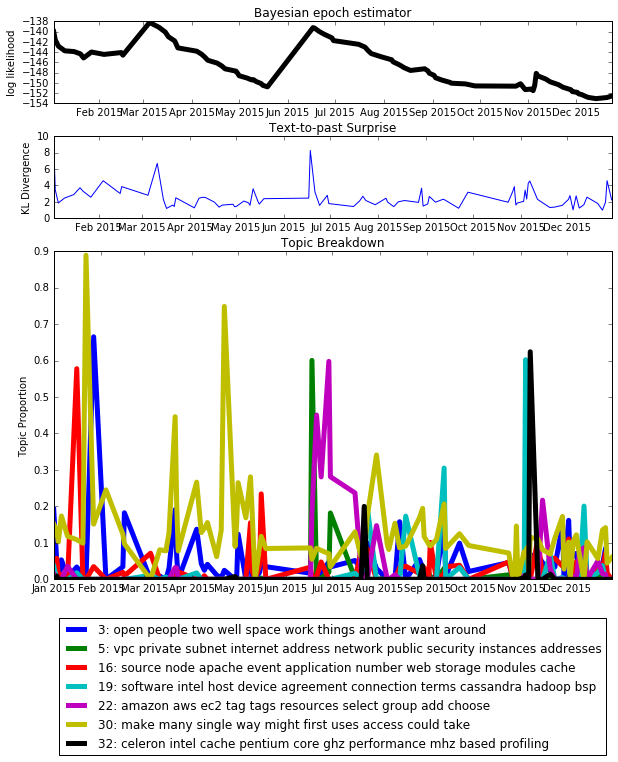

In [128]:
from matplotlib.gridspec import GridSpec
figsize(10,10)
gs = GridSpec(3, 1, height_ratios=[1,1,4])
doc_topics = v.doc_topic_matrix(days)
#colors=dict(get_topic_colors(v))
plt = subplot(gs[2])
t = v.topics()
for i in range(v.model.K):
    if np.any(doc_topics.T[i] > 0.55):
        plt.plot_date(map(convert_date, days), doc_topics.T[i], ls='-', marker=None, #c=colors[i],
                  label=str(i) +': ' + ' '.join(np.array(t[i])['word'][:10]), lw=5)
title("Topic Breakdown")
ylabel("Topic Proportion")
plt.legend(bbox_to_anchor=[0.5,-0.1],loc='upper center')

from vsm.spatial import *
doc_topics = v.doc_topic_matrix(days)
divergence = [KL_div(doc_topics[i], doc_topics[:i].mean(axis=0)) for i in range(1,len(doc_topics))]
plt=subplot(gs[1])
title("Text-to-past Surprise")
ylabel("KL Divergence")
plt.plot_date(map(convert_date, days[1:]), divergence, marker=None, ls='-')

plt=subplot(gs[0])
title("Bayesian epoch estimator")
L = np.array([divs_mle(e) for e in generate_epochs(2, limit=0)])
plt.plot_date(dates[1:-2], L, marker=None, ls='-', c='k', lw=5)
ylabel("log likelihood")